# Step 1: Import of your data

## 1.1 Import your data from excel

In order to fit a michaelis menten model to your data, we first need to import your data from an excel file. The **pandas** package is able to read and extract data from microsoft excel spreadsheet using the command:

```python

df = pd.read_excel(r"path")

```

Now we have all the data imported. In the next step, we want to see, what the contents of the excel files are. Therefore, we visualise the head, which are the first five lines of the spreadsheet

## 1.2 Visualise the content of the excel file

```python
df.head()

```

## 1.3 Select the data from your spreadsheet

Now we want to select the columns of the spreadsheet, to which the model is intended to be fitted. For this purpose, we extract the concentration values and the measured reaction velocities:

```python

concentrations = df["concentration"]
data = df["v"]

```


In [51]:
# https://www.anotherscienceblog.com/post/the-michaelis-menten-enzyme-kinetics-model
from scipy import stats
import numpy as np
import pandas as pd

df = pd.read_excel(r"GruppeB.xlsx")


concentrations = []

concentrations = df["concentration"]
data = df["v"]

print(data)

df.head()


0     0.0000
1     0.0388
2     0.0556
3     0.1208
4     0.1356
5     0.2274
6     0.3459
7     0.3982
8     0.4886
9     0.5509
10    0.6739
11    0.7028
12    0.7794
Name: v, dtype: float64


,concentration,v,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0.00,0.0000,NaN,NaN,km,0.3
1,0.05,0.0388,NaN,NaN,vmax,2.0
2,0.10,0.0556,NaN,NaN,NaN,NaN
3,0.20,0.1208,NaN,NaN,NaN,NaN
4,0.30,0.1356,NaN,NaN,NaN,NaN


Text(0, 0.5, 'reaction velocity in $mmol*L^{-1}*s^{-1}$')

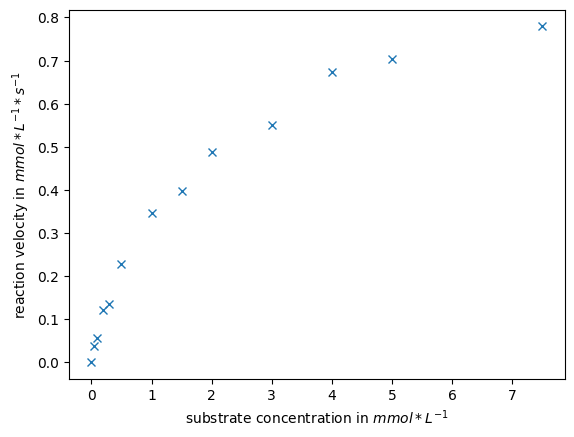

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(concentrations, data, linestyle="", marker="x")
ax.set_xlabel("substrate concentration in $mmol*L^{-1}$")
ax.set_ylabel("reaction velocity in $mmol*L^{-1}*s^{-1}$")


In [53]:
import lmfit

def mm(s, km, vmax):
    v = vmax*s/(km+s)
    return v

reaction_velocity = np.array(data)
print(reaction_velocity)
concentrations = np.array(concentrations)


mdl = lmfit.Model(mm)

params = lmfit.Parameters()
params.add('km', 2, min=0.000001, max=3)
params.add('vmax', 2, min=0.0000000001, max=100)

solution = mdl.fit(data,params=params,s=concentrations)

print(solution.fit_report())
print(solution.best_fit)

fitted_data = solution.best_fit


[0.     0.0388 0.0556 0.1208 0.1356 0.2274 0.3459 0.3982 0.4886 0.5509
 0.6739 0.7028 0.7794]
[[Model]]
    Model(mm)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 13
    # variables        = 2
    chi-square         = 0.00484277
    reduced chi-square = 4.4025e-04
    Akaike info crit   = -98.6378233
    Bayesian info crit = -97.5079246
    R-squared          = 0.99458994
[[Variables]]
    km:    1.88222220 +/- 0.16786160 (8.92%) (init = 2)
    vmax:  0.96090510 +/- 0.03300709 (3.44%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(km, vmax) = 0.921
[0.         0.02486528 0.04847615 0.09229612 0.13209999 0.20168251
 0.33339036 0.426157   0.49502839 0.59045147 0.65342999 0.69810671
 0.76813234]


Text(0, 0.5, 'reaction velocity in $mmol*L^{-1}*s^{-1}$')

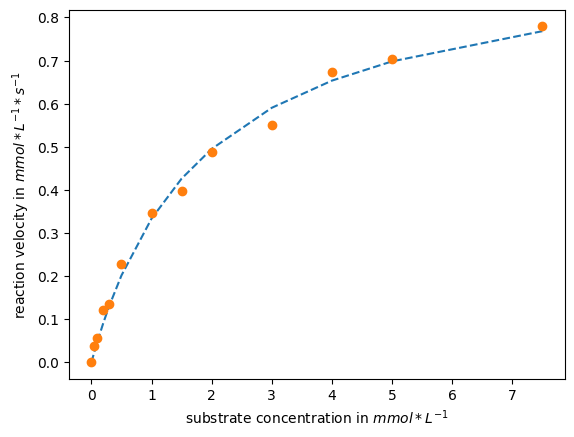

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(concentrations, fitted_data, linestyle="--")
ax.plot(concentrations, data, linestyle="", marker="o")
ax.set_xlabel("substrate concentration in $mmol*L^{-1}$")
ax.set_ylabel("reaction velocity in $mmol*L^{-1}*s^{-1}$")